__크롤링__

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os
import csv
import ujson
import urllib.request

"""메인 url 불러오기"""
def crawler():
     
    f = open("KODEX 200선물인버스2X_2.txt", "w", encoding = "utf-8")
    
    for i in range(1, 2):
        url = "https://finance.naver.com/item/board.naver?code=252670&page="\
        + str(i)

        bring_url = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        cont = bring_url.content
        soup = BeautifulSoup(cont, "html.parser")
        
        # 각 게시물 url
        for urls in soup.find_all("td", {"class":"title"}):
            urlss = urls.find("a")["href"]
            aa = "https://finance.naver.com/"
            urlsss = aa+urlss

            boards = get_it(urlsss)
                
            f.write("{}\t{}\t{}\n".format(boards[0], boards[1], boards[2]))

                #f.close()

"""제목, 본문 크롤러"""
def get_it(urlll):
    
    titles = []
    contents = []
    dates = []
    
    real = requests.get(urlll, headers={'User-Agent': 'Mozilla/5.0'})
    bsp = BeautifulSoup(real.content,"html.parser")
    
    #게시물 날짜
    try:
        date = bsp.select_one("th.gray03.p9.tah").text
        dates.append(date.strip())
    except Exception as e:
        print(e)
        #continue
    
    #게시물 제목
    try:
        title = bsp.select_one("th").text
        titles.append(title.strip())
    except Exception as e:
        print(e)
        #continue
    
    #본문
    try:
        content = bsp.select_one("#body").text
        content_re = content.replace("\n", " ").replace("\r", " ")
        contents.append(content_re.strip())
    except Exception as e:
        print(e)
        #continue

    return dates, titles, contents

"""열 이름 만들기"""
def bring_it():
    aa = pd.read_csv("KODEX 200선물인버스2X_2.txt", sep = "\t", encoding = "utf-8")
    
    header = "date title content".split()
                
    df = pd.DataFrame(aa)
    
    df.to_csv("KODEX 200선물인버스2X_2.txt", sep = "\t", index = False, header = header, encoding = "utf-8")
    

"""csv파일로 아웃"""
def make_excel():
    bb = pd.read_csv("KODEX 200선물인버스2X_2.txt", sep = "\t", encoding = "utf-8")
    bb.columns = ['date', 'title', 'content']
    
    xlsx_outputFileName = "KODEX 200선물인버스2X_2.csv"
    bb.to_csv(xlsx_outputFileName, encoding = "utf-8")
    KODEX 200선물인버스2X_2


crawler()
bring_it()    
make_excel()

__형태소 분석__

In [ ]:
import numpy as np; np.random.seed(1004)
import pandas as pd
import ujson
import re
from konlpy.tag import Okt

"""두 컬럼 하나로 합치기"""
data_file = pd.read_csv("KODEX 200선물인버스2X_2.csv", sep = ",", encoding = "utf-8")
header = "date title content".split()
data_file = pd.DataFrame(data_file, columns = ["date", "title", "content"])

#data_file["title"] = data_file["title"].astype(str)
#data_file["content"] = data_file["content"].astype(str)

data_file["full_texts"] = data_file[["title", "content"]].apply(",".join, axis = 1)

header = "date title content full_texts".split()
data_file.to_csv("KODEX 200선물인버스2X_2.txt", sep = "\t", header = header, encoding = "utf-8", index = False)


"""이모티콘 지우기"""
def remove_emoji(hate_it):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U0001F1F2-\U0001F1F4"  
        u"\U0001F300-\U0001F5FF"  
        u"\U00002700-\U000027BF"  
        u"\U0001F1E6-\U0001F1FF"
        u"\U00002702-\U000027B0"
        "]+", flags = re.UNICODE)
    
    return emoji.sub(r"", hate_it)

"""문장 단위 분절"""
def split_lines(lines):
    lines = lines.strip().replace("\n\n", "\n").replace(".", "\n").replace("?", "\n").replace("!", "\n")
    finish_lines = lines.splitlines()

    return finish_lines

"""단어 단위 품사 태깅"""
def find_pos(this, words):
    word_pos = []
    word = split_lines(words)
    

    for garbage in word:
        without_emj = remove_emoji(garbage)
        without_special = re.sub("[\W]", "", without_emj)

        gotchaa = this.pos(without_special)
        word_pos.append(gotchaa)
        
    return word_pos

"""파일 가져오기"""
def bring_file(files):
    header_name = ["date", "title", "content", "full_texts"]
    contents = []

    
    with open(files, "r", encoding = "utf-8")as input_file:
        
        for apple in input_file:
            apple = apple.strip().split("\t")
            
            box = {}
            
            for ap, ple in zip(header_name, apple):
                box[ap] = ple
                
            contents.append(box)
            
        full_contents = contents[1:]
        
        return full_contents
            
"""형태소 분석"""
def real_pos(words):
    full_textss = []
    okt = Okt()
    
    for word in words:
        line = word["full_texts"]
        it_word = find_pos(okt, line)
        
        word["full_pos"] = it_word
        full_textss.append(word) 
    
    return full_textss

"""파일 아웃"""
def file_out(out_json_name, finished):
    with open(out_json_name, "w", encoding = "utf-8")as out_json:
        
        for contents in finished:
            out_it = ujson.dumps(contents, ensure_ascii = False)
            
            print(out_it, file = out_json)
            
"""실행"""            
def main():
    
    input_f = "KODEX 200선물인버스2X_2.txt"
    output_f = "pos_KODEX 200선물인버스2X_2.txt"
    
    data = bring_file(input_f)
    make_pos = real_pos(data)
    file_out(output_f, make_pos)
    
    
main()   
    

__크롤링한 데이터 날짜별로 병합 - 토픽모델링용__
(해당 코드는 토픽모델링을 위한 날짜 병합 코드이기 때문에, 이후 토픽모델링 코드에서도 중복되는 점 양해부탁드립니다.)

In [ ]:
import json

FEATURE_POS = ["Noun", "Verb", "Adjective"]
my_word = ["뉴스", "뉴시스", "기사", "코로나", "시국", "합니다", "입니다",\
           "경향신문", "매일신문", "전자신문", "연합뉴스", "데일리안", "조선일보", "조세일보",\
           "동영상", "채널", "뉴스레터", "이데일리", "머니투데이"]

fp = open("/Users/jangseohee/Desktop/BIDM/project/토픽모델/네이버news_merge2.txt",'rt',encoding="UTF-8")
lines = fp.readlines()

reviews = dict()
for line in lines:
    sample = json.loads(line)
    date = sample['date'][0:10]
    date = date.split()[0]
    if date in reviews:
        reviews[date].extend(sample['full_pos'])
    else:
        reviews[date] = sample['full_pos']

for k, sentences in reviews.items():
    reviews_flat = []
    for s in sentences:
        reviews_flat.extend(s)
    reviews[k] = reviews_flat

# print(reviews['2021.09.30'])

import pickle
f = open("naver2.txt", 'wb')
pickle.dump(reviews, f)

f=open("naver2.txt", 'rb')
data=pickle.load(f)
print(data)
print()

def day_topic(date,input_file_name):
    f = open(input_file_name,'rb')
    data = pickle.load(f)
    words  = select_word(data[date])
    
    print(f"토픽분석 날짜는 {date} 입니다.")
    print(words)
    
    return words
    
def select_word(word_pos):
    words = []
    for word, pos in word_pos:
        if pos not in FEATURE_POS:
            continue
        if word in my_word:
            continue
        if len(word) == 1:
            continue                                         
        words.append(word)
    return words

input_file_name = "naver2.txt" 
documents = day_topic('2021.09.08', input_file_name)

__크롤링한 데이터 날짜별로 병합 - 감성분석용__

In [ ]:
import pandas as pd
import ujson
import ast

pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)



done = []
with open("삼성전자_토론방_최종.txt","r", encoding="UTF-8")as fp:
    fp2 = fp.readlines()
    for a in fp2:
        a = a.replace("\n", "")
        line = ast.literal_eval(a)
        done.append(line)



def splitit(love):
    date = []
    full_pos = []
    for dic in love:
        dates = dic["date"]
        pos = dic["full_pos"]
        date.append(dates[2:12])
        full_pos.append(pos)

    good = pd.DataFrame({"date":date, "full_pos":full_pos})
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
    return good




def time_set(here):
    this_pos = []
    this = dict()
    with open("out_json_name.txt", "a", encoding = "utf-8")as out_json:
        for t, p in zip(here["date"], here["full_pos"]):

            for P in p:
                if t in this:
                    this[t].extend(P)
                else:
                    this[t] = P

        this_pos.append(this)

    return this_pos
    

    

def final_out(out_json_name, finished):
    with open(out_json_name, "w", encoding = "utf-8")as out_json:
        
        for finish in finished:
            for i, j in finish.items():
                a = {"date":i, "full_pos":j}
                out_it = ujson.dumps(a, ensure_ascii = False)
                print(out_it, file = out_json)
            
            
            
def main():            
    
    output_f = "삼성전자_토론방_날짜.txt"
    
    feel = splitit(done)
    aa = time_set(feel)
    final_out(output_f, aa)

    
main()


__정형데이터 정규화 (시장금리, 환율데이터)__

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
columns = ["시장금리_CD","시장금리_CMA","시장금리_KORIBOR","시장금리_MMF","환율데이터"]
my_dict = dict()
input_datas = []
CD_df=pd.read_csv('시장금리_CD.csv')
date = CD_df['Date'].tolist()[:-1]
for c in columns:
    scaler=MinMaxScaler()
    if c =="환율데이터":
        temp = pd.read_csv(f"{c}.csv")[["Currency"]]
        scaler.fit(temp)
        my_dict[c] = list(map(lambda a : a[0],scaler.transform(temp).tolist()[:214]))
    else:
        temp = pd.read_csv(f"{c}.csv")[["Rate"]]
        scaler.fit(temp)
        my_dict[c] = list(map(lambda a : a[0],scaler.transform(temp).tolist()[:214]))

mydf = pd.DataFrame(my_dict, index=date, columns=columns)

mydf.to_csv("./result.csv")

__기업별 미시지표 정규화__
- volume: 거래량
- market_price: 시작가
- high_price: 고가
- low_price: 저가
- closing_price: 종가

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
micro_df = pd.read_csv('LG화학_미시지표.csv')
print(micro_df)

col = ["volume", "market_price", "high_price", "low_price", "closing_price"]
new_date = micro_df['Date']
t_dict = dict()
for c in col:
    scaler = MinMaxScaler()
    temp = micro_df[[c]]
    scaler.fit(temp)
    t_dict[c] = list(map(lambda a : a[0],scaler.transform(temp).tolist()))

processed_df = pd.DataFrame(t_dict, index=new_date, columns=col)
processed_df.to_csv("./LG화학_미시지표_result.csv")

__감성분석__

In [ ]:
#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(wordname):	
		with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('어근:' + r_word)
		print('감성: ' + s_word)
		
		
		return r_word, s_word

def get_data(file_path):
	data = []
	with open(file_path, "r", encoding="utf-8") as f:
		for line in f:
			data.append(json.loads(line.strip()))
	f.close()
	return data

def save_txt(data):
	with open('s1_data.txt', 'w', encoding='utf-8') as f:
		for line in data:
			f.write(line)
			f.write('\n')
	f.close()


if __name__ == "__main__":
	
	ksl = KnuSL


	data_new = []
	data_new.append('Date\tPinterest')
	data = get_data("s1.txt")
	for line in data:
		polarity = 0
		count = 0
		for word in line["full_pos"]:
			if ksl.data_list(word[0])[1] == 'None':
				polarity += 0
			else:
				count += 1
				polarity += float(ksl.data_list(word[0])[1])
		polarity = polarity / count
		data_new.append("{}\t{}".format(line['date'], polarity))
	save_txt(data_new)


__정형데이터 로지스틱 회귀__

- 로지스틱회귀: 3~8월


- confusion matrix plot
- 각 변수 별 coefficient
- accuracy score

- GridSearchCV로 최적의 parameter 찾기
- 새로운 logit으로 다시 training


- 9월 predict(original logit vs new logit)
- 9월 predicts vs real value 비교 data frame


__필요한 모듈 불러오기__

In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pylab import savefig
import scikitplot as skplt

import dataframe_image as dfi

import warnings
warnings.filterwarnings(action='ignore')

__로지스틱 회귀모델__

3~8월

In [ ]:
a1 = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/정형데이터 최종/result.csv", sep = ",", encoding = "euc-kr")
b1 = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/정형데이터 최종/삼성바이오로직스_미시지표_result.csv", sep = ",")
c1 = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/정형데이터 최종/삼성바이오로직스_classification.csv", sep = ",")

a = pd.DataFrame(a1[0:184]) #3~8월
b = pd.DataFrame(b1[0:184])
c = pd.DataFrame(c1[0:184])

#a.head()
#b.head() #거래량: volume 시가:market_price 고가: high_price 저가: low_price 종가: closing_price
#c.head() #classification
#c["classification"].value_counts()

aa = a.drop(columns = ["Date"], axis = 1)
bb = b.drop(columns = ["Date", "closing_price"], axis = 1)

data = pd.concat([aa,bb], axis = 1)
target = c.classification

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.4, random_state = 18)

a_logit = LogisticRegression(solver='lbfgs', multi_class = 'multinomial')
a_logit.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

__accuracy score__

__각 변수 별 coefficient__

__confusion matrix plot__

accuracy score: 0.540540541
intercept[-1]: 1.25445 
intercept[0]: -2.63736 
intercept[1]: 1.38291
------------------------------------------------------------------------------------------------
              coefficient[-1]  coefficient[0]  coefficient[1]
시장금리_CD             -0.872020        0.867977        0.004043
시장금리_CMA             0.235467        0.514909       -0.750376
시장금리_KORIBOR        -0.654991        0.786292       -0.131301
시장금리_MMF            -0.524717        0.403497        0.121220
환율                  -0.309936        0.592273       -0.282336
volume              -0.664803       -0.143806        0.808609
market_price         0.765694        0.112156       -0.877850
high_price          -0.270148        0.029821        0.240326
low_price           -0.189814        0.119011        0.070803
------------------------------------------------------------------------------------------------
[[ 7  0 24]
 [ 0  0  2]
 [ 8  0 33]]
AxesSubplot(0.125,0.125;0.62x0.755)


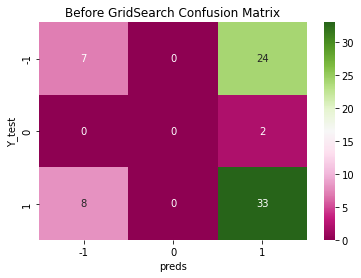

In [ ]:
preds = a_logit.predict(X_test)
conf = confusion_matrix(Y_test, preds)

#print(preds)
#print(Y_test)
print("accuracy score: {0:.9f}".format(accuracy_score(Y_test, preds)))
print("intercept[-1]:", np.round(a_logit.intercept_[0], 5), "\nintercept[0]:", np.round(a_logit.intercept_[1], 5),
      "\nintercept[1]:", np.round(a_logit.intercept_[2], 5))
print("------------------------------------------------------------------------------------------------")
print(pd.DataFrame({"coefficient[-1]": np.round(a_logit.coef_[0], 6), "coefficient[0]": np.round(a_logit.coef_[1], 6),
                    "coefficient[1]": np.round(a_logit.coef_[2], 6)}, index = data.columns))
print("------------------------------------------------------------------------------------------------")
print(conf)

"""
plt.matshow(confusion_matrix(Y_test, preds))
plt.title("confusion matrix")
plt.pink()
plt.colorbar()
plt.xlabel("Y_test")
plt.ylabel("predict")
plt.show()"""

cate = ['-1', '0', '1']
draw = sns.heatmap(conf, annot = True, cmap = 'PiYG', xticklabels = cate, yticklabels = cate)
draw.set_xlabel("preds", fontsize = 10)
draw.set_ylabel("Y_test", fontsize = 10)
draw.set_title("Before GridSearch Confusion Matrix")

print(draw)
draws = draw.get_figure() 
draws.savefig('confu1.png', dpi=400)

__GridSearch로 최적의 parameter 찾기__

In [ ]:
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver": ["newton-cg", "sag", "saga", "lbfgs"]}

b_logit = LogisticRegression(multi_class = 'multinomial')
G_S_logit = GridSearchCV(b_logit, param_grid=params, cv=3, refit=True)

In [ ]:
G_S_logit.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']})

In [ ]:
result = pd.DataFrame(G_S_logit.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016383,0.006498,0.000000,0.000000,0.001,newton-cg,"{'C': 0.001, 'solver': 'newton-cg'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
1,0.000000,0.000000,0.008043,0.000020,0.001,sag,"{'C': 0.001, 'solver': 'sag'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
2,0.005236,0.007404,0.000000,0.000000,0.001,saga,"{'C': 0.001, 'solver': 'saga'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
3,0.010416,0.007365,0.000000,0.000000,0.001,lbfgs,"{'C': 0.001, 'solver': 'lbfgs'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
4,0.017802,0.003069,0.000000,0.000000,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
5,0.005208,0.007365,0.000000,0.000000,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
6,0.000000,0.000000,0.000000,0.000000,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
7,0.007213,0.006436,0.005184,0.007331,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.513514,0.513514,0.500000,0.509009,0.006370,21
8,0.015627,0.000010,0.000000,0.000000,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.513514,0.540541,0.527778,0.527277,0.011039,17
9,0.010496,0.007422,0.000000,0.000000,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.513514,0.540541,0.527778,0.527277,0.011039,17


In [ ]:
dfi.export(result[["param_C", "param_solver", "split0_test_score", "split1_test_score", "split2_test_score", "rank_test_score"]],
           'G_S_result.png')

In [ ]:
print("GridSearchCV best parameter: ", G_S_logit.best_params_, "\nGridSearchCV best parameter: ", G_S_logit.best_score_)

GridSearchCV best parameter:  {'C': 100, 'solver': 'newton-cg'} 
GridSearchCV best parameter:  0.745995995995996


accuracy score: 0.797297297
intercept[-1]: -0.51233 
intercept[0]: -0.61634 
intercept[1]: 1.12867
------------------------------------------------------------------------------------------------
              coefficient[-1]  coefficient[0]  coefficient[1]
시장금리_CD              4.009392       -6.156811        2.147419
시장금리_CMA            -0.739976       -0.045698        0.785674
시장금리_KORIBOR        -4.022396        3.085593        0.936803
시장금리_MMF             4.476547       -5.788686        1.312139
환율                   2.063098       -0.957034       -1.106065
volume              -1.257444        0.544863        0.712581
market_price        21.343945        1.404570      -22.748516
high_price          -4.742119       -3.062421        7.804540
low_price          -14.769743        1.554343       13.215400
------------------------------------------------------------------------------------------------
[[27  0  4]
 [ 2  0  0]
 [ 9  0 32]]
AxesSubplot(0.125,0.125;0.62x0.755)


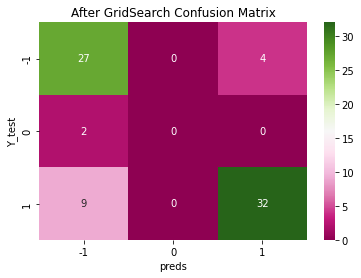

In [ ]:
#찾아낸 최적의 파라미터로 새 로짓 만듦
new_logit = G_S_logit.best_estimator_

preds = new_logit.predict(X_test)
conf = confusion_matrix(Y_test, preds)

#print(preds)
#print(Y_test)
print("accuracy score: {0:.9f}".format(accuracy_score(Y_test, preds)))
print("intercept[-1]:", np.round(new_logit.intercept_[0], 5), "\nintercept[0]:", np.round(new_logit.intercept_[1], 5),
      "\nintercept[1]:", np.round(new_logit.intercept_[2], 5))
print("------------------------------------------------------------------------------------------------")
print(pd.DataFrame({"coefficient[-1]": np.round(new_logit.coef_[0], 6), "coefficient[0]": np.round(new_logit.coef_[1], 6),
                    "coefficient[1]": np.round(new_logit.coef_[2], 6)}, index = data.columns))
print("------------------------------------------------------------------------------------------------")
print(conf)

"""
plt.matshow(confusion_matrix(Y_test, preds))
plt.title("confusion matrix")
plt.pink()
plt.colorbar()
plt.xlabel("Y_test")
plt.ylabel("predict")
plt.show()"""

cate = ['-1', '0', '1']
draw = sns.heatmap(conf, annot = True, cmap = 'PiYG', xticklabels = cate, yticklabels = cate)
draw.set_xlabel("preds", fontsize = 10)
draw.set_ylabel("Y_test", fontsize = 10)
draw.set_title("After GridSearch Confusion Matrix")

print(draw)
draws = draw.get_figure() 
draws.savefig('confu2.png', dpi=400)

In [ ]:
su = pd.DataFrame({"coefficient[-1]": np.round(new_logit.coef_[0], 6), "coefficient[0]": np.round(new_logit.coef_[1], 6),
                    "coefficient[1]": np.round(new_logit.coef_[2], 6)}, index = data.columns)
mm = [np.round(a_logit.intercept_[0], 5), np.round(new_logit.intercept_[1], 5), np.round(new_logit.intercept_[2], 5)]
m = pd.DataFrame({"intercept": mm}, index = ["coefficient[-1]","coefficient[0]", "coefficient[1]"]).transpose()

fi = pd.concat([m, su])
dfi.export(fi, "정형데이터_result.png")

__로지스틱 회귀모델__

9월

accuracy score

각 predict vs real value 비교 data frame

In [ ]:
c = pd.DataFrame(a1[184:]) #9월
d = pd.DataFrame(b1[184:])
e = pd.concat([c,d.drop(columns = ["Date"])], axis = 1)
f = pd.DataFrame(c1[184:])

e = e.reset_index()
f = f.reset_index()

new_data = e.drop(columns = ["index", "Date", "closing_price"])
original = f.classification

preds = a_logit.predict(new_data)

p = pd.DataFrame({"Predict":preds})

preds_2 = new_logit.predict(new_data)

p2 = pd.DataFrame({"New_Predict":preds_2})

final = pd.concat([e["Date"], original, p, p2], axis = 1)
final.set_index("Date", inplace = True)
final = pd.DataFrame(final).transpose()

print("accuracy score: {0:.4f}".format(accuracy_score(original, preds)),
      "\nNew_accuracy score: {0:.4f}".format(accuracy_score(original, preds_2)))
#final[["Date", "classification", "Predict", "New_Predict"]]
final

accuracy score: 0.5333 
New_accuracy score: 0.8333


Date,2021-09-01,2021-09-02,2021-09-03,2021-09-04,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,...,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30
classification,1,-1,1,1,1,1,-1,-1,-1,1,...,-1,-1,-1,1,1,1,-1,-1,1,1
Predict,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
New_Predict,1,-1,1,1,1,-1,-1,-1,1,1,...,-1,-1,-1,1,1,1,-1,-1,1,-1


In [ ]:
dfi.export(final[["Date", "classification", "Predict", "New_Predict"]], '9월 예측.png')

### 비정형데이터 로지스틱 회귀

- 로지스틱회귀: 3~8월


- confusion matrix plot
- 각 변수 별 coefficient
- accuracy score



- 9월 predict(original logit vs new logit with C)
- 9월 predicts vs real value 비교 data frame

__감성분석 결과 붙인 새 train, test set__

In [ ]:
sentiment = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/감성분석데이터/NAVER_data.txt", sep = "\t")
targets = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/정형데이터 최종/NAVER_classification.csv", sep = ",")
A = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/정형데이터 최종/result.csv", sep = ",", encoding = "euc-kr")
B = pd.read_csv("C:/Users/musky/Desktop/2021-2학기 파이썬노트/BIDM/로지스틱/정형데이터 최종/네이버_미시지표_result.csv", sep = ",")


ai = pd.DataFrame(A[0:184]) #3~8월
bi = pd.DataFrame(B[0:184])

AA = ai.drop(columns = ["Date"], axis = 1)
BB = bi.drop(columns = ["Date", "closing_price"], axis = 1)
sentiment.astype({"Pinterest":"float"})

sentiment.sort_values(by = ["Date"], ascending = True,ignore_index = True , inplace = True)
senti = sentiment["Pinterest"][0:184] #3~8월까지

targets = pd.DataFrame(targets)
targets_8 = targets[0:184]

final_data = pd.concat([AA,BB,senti], axis = 1)
Targets = targets_8["classification"]

train_X, test_X, train_Y, test_Y = train_test_split(final_data, Targets, test_size = 0.4, random_state = 88)

__찾아놓은 best parameter로 로지스틱 모델 생성__

with C accuracy score: 0.837837838
intercept[-1]: 1.06035 
intercept[0]: -2.19109 
intercept[1]: 1.13074
------------------------------------------------------------------------------------------------
              coefficient[-1]  coefficient[0]  coefficient[1]
시장금리_CD               3.09823        -2.38678        -0.71145
시장금리_CMA             -0.18807        -0.12427         0.31234
시장금리_KORIBOR         -2.42791        -2.09008         4.51799
시장금리_MMF              2.70982        -3.93961         1.22979
환율                    1.45442        -0.75686        -0.69756
volume                0.12442        -0.44385         0.31942
market_price         21.89723         0.97308       -22.87031
high_price           -6.32971        -0.96924         7.29896
low_price           -14.89114         2.43179        12.45934
Pinterest            -2.23860         2.72153        -0.48293
------------------------------------------------------------------------------------------------
[[33  0  3]
 [ 0  0

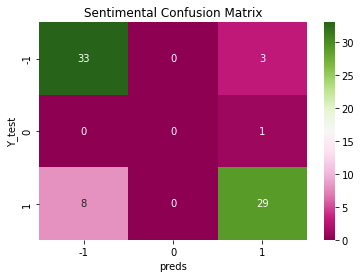

In [ ]:
final_logit = LogisticRegression(C = 100, solver = 'newton-cg', multi_class = 'multinomial')
final_logit.fit(train_X, train_Y)

predicts = final_logit.predict(test_X)
confusion_M = confusion_matrix(test_Y, predicts)


print("with C accuracy score: {0:.9f}".format(accuracy_score(test_Y, predicts)))
print("intercept[-1]:", np.round(final_logit.intercept_[0], 5), "\nintercept[0]:", np.round(final_logit.intercept_[1], 5),
      "\nintercept[1]:", np.round(final_logit.intercept_[2], 5))
print("------------------------------------------------------------------------------------------------")
#print("coefficient[-1]: ", np.round(final_logit.coef_[2], 5))
coef = pd.DataFrame({"coefficient[-1]": np.round(final_logit.coef_[0], 5), "coefficient[0]": np.round(final_logit.coef_[1], 5),
        "coefficient[1]": np.round(final_logit.coef_[2], 5)}, index = final_data.columns)
print(coef)
print("------------------------------------------------------------------------------------------------")
print(confusion_M)

"""
plt.matshow(confusion_matrix(Y_test, preds))
plt.title("confusion matrix")
plt.pink()
plt.colorbar()
plt.xlabel("Y_test")
plt.ylabel("predict")
plt.show()"""

cate = ['-1', '0', '1']
draw = sns.heatmap(confusion_M, annot = True, cmap = 'PiYG', xticklabels = cate, yticklabels = cate)
draw.set_xlabel("preds", fontsize = 10)
draw.set_ylabel("Y_test", fontsize = 10)
draw.set_title("Sentimental Confusion Matrix")

print(draw)
draws = draw.get_figure() 
draws.savefig('confu3.png', dpi=400)

__9월 Predict__

original logit vs with C=100 logit

In [ ]:
ai = pd.DataFrame(A[184:]) #9월
bi = pd.DataFrame(B[184:])
ci = pd.DataFrame(sentiment[184:])
ei = pd.concat([ai,bi.drop(columns = ["Date"]), ci.drop(columns = ["Date"])], axis = 1)
targets_9 = targets[184:]


ei = ei.reset_index()
targets_9 = targets_9.reset_index()

New_data = ei.drop(columns = ["index", "Date", "closing_price"])
Original = targets_9.classification

preds_3 = a_logit.predict(new_data)

p3 = pd.DataFrame({"before_GridSearch":preds})

preds = new_logit.predict(new_data)

p = pd.DataFrame({"after_GridSearch":preds})

preds_2 = final_logit.predict(New_data)

p2 = pd.DataFrame({"GridSearch&senti":preds_2})


final = pd.concat([ei["Date"], Original,p3, p ,p2], axis = 1)
final.set_index("Date", inplace = True)
final = pd.DataFrame(final).transpose()

print("with_C_accuracy score: {0:.4f}".format(accuracy_score(Original, preds_2)), 
      "\nOriginal_accuracy score: {0:.4f}".format(accuracy_score(Original, preds_3)),
     "\nsentimental_accuracy score: {0:.4f}".format(accuracy_score(Original, preds_3)))
#final[["Date", "classification", "Predict", "New_Predict"]]
dfi.export(final, "final_result.png")

with_C_accuracy score: 0.8333 
Original_accuracy score: 0.5333 
sentimental_accuracy score: 0.5333


__일일 주가등락률 상위/하위 추출__

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('NAVER_미시지표.csv')
data.head(20)

In [ ]:
data['diff'] = data.apply(lambda x: x.closing_price - x.market_price, axis='columns')

#data['classification'] = [1 if t else -1 for t in list(data['diff']  > 0)]

data['diff_rate'] = ((data['closing_price'] - data['market_price']) / data['market_price']) * 100

data.head(20)

In [ ]:
def func(x) :
    if x > 0 :
        return 1
    if x < 0 :
        return -1
    else :
        return 0

data['classification'] = data["diff"].apply(lambda x : func(x))
data.head()

In [ ]:
label = data.loc[:, ['classification']]

label.head()
#label.to_csv("삼성바이오로직스_classification.csv")

In [ ]:
label.to_csv('NAVER_classification.csv')

__일일 주가 상승폭 상위 top 3 추출__

In [ ]:
data.sort_values(by='diff_rate', ascending=False).head(5)

__일일 주가 하락폭 상위 top 3 추출__

In [ ]:
data.sort_values(by='diff_rate', ascending=True).head(5)

__토픽모델링__

In [ ]:
import json

FEATURE_POS = ["Noun", "Verb", "Adjective"]
my_word = ["뉴스", "뉴시스", "기사", "코로나", "시국", "합니다", "입니다",\
           "경향신문", "매일신문", "전자신문", "연합뉴스", "데일리안", "조선일보", "조세일보",\
           "동영상", "채널", "뉴스레터", "이데일리", "머니투데이"]

fp = open("/Users/jangseohee/Desktop/BIDM/project/토픽모델/네이버news_merge2.txt",'rt',encoding="UTF-8")
lines = fp.readlines()

reviews = dict()
for line in lines:
    sample = json.loads(line)
    date = sample['date'][0:10]
    date = date.split()[0]
    if date in reviews:
        reviews[date].extend(sample['full_pos'])
    else:
        reviews[date] = sample['full_pos']

for k, sentences in reviews.items():
    reviews_flat = []
    for s in sentences:
        reviews_flat.extend(s)
    reviews[k] = reviews_flat

# print(reviews['2021.09.30'])

import pickle
f = open("naver2.txt", 'wb')
pickle.dump(reviews, f)

f=open("naver2.txt", 'rb')
data=pickle.load(f)
print(data)
print()

def day_topic(date,input_file_name):
    f = open(input_file_name,'rb')
    data = pickle.load(f)
    words  = select_word(data[date])
    
    print(f"토픽분석 날짜는 {date} 입니다.")
    print(words)
    
    return words

    
def select_word(word_pos):
    words = []
    for word, pos in word_pos:
        if pos not in FEATURE_POS:
            continue
        if word in my_word:
            continue
        if len(word) == 1:
            continue                                         
        words.append(word)
    return words

input_file_name = "naver2.txt" 
documents = day_topic('2021.09.08', input_file_name)

In [ ]:
from gensim import corpora
from gensim import models

#dictionary = corpora.Dictionary([documents.split()])
#dictionary = [d.split() for d in documents]
#tokens = [word for word in documents.split()]
documents = [d.split() for d in documents]

dictionary = corpora.Dictionary(documents)

n_items = len(dictionary)
doc = [dictionary.doc2bow(text) for text in documents]
tfidf = models.TfidfModel(doc)
corpus = tfidf[doc]

In [ ]:
import numpy as np; np.random.seed(2345)

NUM_TOPICS = 10
lda_model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [ ]:
from pprint import pprint

pprint(lda_model.print_topics())

In [ ]:
def print_document_topics(lda_model, corpus):
    
    for doc_num, doc in enumerate(corpus):
        topic_probs = lda_model[doc]
        print("Doc num: {}".format(doc_num))

        for topic_id, prob in topic_probs:
            print("\t{}\t{}".format(topic_id, prob))
            
        # break

        print("\n")   
        
print_document_topics(lda_model, corpus)

In [ ]:
#토픽 시각화

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.save_html(vis_data, "네이버_0908_tm.html") 